# TASCA SPRINT 9  Feature Engineering

## NIVELL 3

### *Exercici 3*

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

+ *Començo important el meu data set de tenis*

In [2]:
tenis_df = pd.read_csv('Match.csv')
tenis_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0
...,...,...,...,...,...,...,...,...,...
10155,m_2000_W_122,Quarterfinals,2000-06-26,3.95,37.3,41.5,Wimbledon,2000,166.0
10156,m_2000_W_123,Quarterfinals,2000-06-26,4.26,39.0,48.3,Wimbledon,2000,145.0
10157,m_2000_W_124,Semifinals,2000-06-26,3.74,37.2,39.6,Wimbledon,2000,198.0
10158,m_2000_W_125,Semifinals,2000-06-26,3.30,34.7,33.0,Wimbledon,2000,99.0


+ *I estudio els null values que pot contenir*

In [3]:
tenis_df.isnull().sum()

match_id              0
round                 0
date                  0
avg_minutes_game     46
avg_seconds_point    45
avg_minutes_set      82
tournament            0
year                  0
match_minutes        43
dtype: int64

+ *Em desfaig de les observacions que continguin algun null value*

In [4]:
tenis_df = tenis_df.dropna()
tenis_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0
...,...,...,...,...,...,...,...,...,...
10155,m_2000_W_122,Quarterfinals,2000-06-26,3.95,37.3,41.5,Wimbledon,2000,166.0
10156,m_2000_W_123,Quarterfinals,2000-06-26,4.26,39.0,48.3,Wimbledon,2000,145.0
10157,m_2000_W_124,Semifinals,2000-06-26,3.74,37.2,39.6,Wimbledon,2000,198.0
10158,m_2000_W_125,Semifinals,2000-06-26,3.30,34.7,33.0,Wimbledon,2000,99.0


+ *I comprovo que no en queda cap*

In [5]:
tenis_df.isnull().sum()

match_id             0
round                0
date                 0
avg_minutes_game     0
avg_seconds_point    0
avg_minutes_set      0
tournament           0
year                 0
match_minutes        0
dtype: int64

+ *Em desfaig de les columnes que no contenen variables numèriques*

In [6]:
tenis_df.drop(['match_id', 'round','date','tournament', 'year'], axis = 1, inplace = True)

C:\Users\Enric\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
tenis_df

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
0,4.81,46.8,43.3,173.0
1,3.95,35.7,40.5,162.0
2,4.86,42.3,43.8,175.0
3,4.43,43.3,41.0,164.0
4,4.37,39.7,43.7,131.0
...,...,...,...,...
10155,3.95,37.3,41.5,166.0
10156,4.26,39.0,48.3,145.0
10157,3.74,37.2,39.6,198.0
10158,3.30,34.7,33.0,99.0


+ *Miro amb ".describe()" com existeixen realment valors de les diferents variables que estan clarament per sobre i per
   sota, del 75é i 25é percentil respectivament.*

In [8]:
tenis_df.describe()

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
count,10078.000000,10078.000000,10078.000000,10078.000000
mean,4.055539,38.224658,39.223477,142.781802
std,0.870338,8.407842,10.129553,51.990544
min,0.000000,0.000000,0.000000,0.000000
25%,3.730000,36.100000,34.400000,109.000000
50%,4.110000,38.800000,39.300000,138.000000
75%,4.500000,41.600000,44.700000,176.000000
max,9.700000,390.000000,133.000000,665.000000


+ *Em desfaig de les observacions que tenen valor = 0. Són partits on no s'ha presentat un jugador per lesió
   en un partit anterior i no té sentit tenir-los en consideració*

In [9]:
index_names = tenis_df[tenis_df['match_minutes'] == 0].index
tenis_df.drop(index_names, inplace = True)

C:\Users\Enric\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
tenis_df

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
0,4.81,46.8,43.3,173.0
1,3.95,35.7,40.5,162.0
2,4.86,42.3,43.8,175.0
3,4.43,43.3,41.0,164.0
4,4.37,39.7,43.7,131.0
...,...,...,...,...
10155,3.95,37.3,41.5,166.0
10156,4.26,39.0,48.3,145.0
10157,3.74,37.2,39.6,198.0
10158,3.30,34.7,33.0,99.0


+ *__Ara torno a mirar amb ".describe()" com existeixen realment valors de les diferents variables que estan clarament per
   sobre i per sota, del 75é i 25é percentil respectivament.__*

In [11]:
tenis_df.describe()

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
count,9823.000000,9823.000000,9823.000000,9823.000000
mean,4.160818,39.216950,40.241698,146.488344
std,0.582288,5.797282,8.018269,47.224700
min,0.830000,7.100000,8.600000,17.000000
25%,3.760000,36.300000,35.000000,111.000000
50%,4.120000,38.900000,39.500000,140.000000
75%,4.510000,41.700000,44.800000,177.000000
max,9.700000,390.000000,133.000000,665.000000


   *Un cop comprovat que no tinc cap valor = 0 que em distorsioni més del necessari el meu estudi estadístic,*
 
   *Puc mirar d'identificar el rang interquartil ("interquantile range o IQR); que és la diferència entre Q3 i Q1*

   *Amb el següent codi podem calcular i imprimir l'IQR per cada una de les variables del dataset*

In [12]:
Q1 = tenis_df.quantile(0.25)
Q3 = tenis_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

avg_minutes_game      0.75
avg_seconds_point     5.40
avg_minutes_set       9.80
match_minutes        66.00
dtype: float64


+ *I també és possible estudiar quina és la skewness de les diferents variables.De forma ideal aquesta skewness, hauria de ser 
   un valor entre -1 i +1 (de forma associada al fet de que les dades tenen una distribució normal)*
   
   *Una major desviació d'aquest rang indica la presència de valors extrems("outliers")* 

In [13]:
print(tenis_df['avg_seconds_point'].skew())
tenis_df['avg_seconds_point'].describe()

23.958710952652112


count    9823.000000
mean       39.216950
std         5.797282
min         7.100000
25%        36.300000
50%        38.900000
75%        41.700000
max       390.000000
Name: avg_seconds_point, dtype: float64

+ *Un cop obtingut el "skewness value" de la variable 'avg_seconds_point' veiem que té un biaix a la dreta molt important*
  *El valor màxim d'aquesta variable = 390,000000 segons prova aquest fet (és 10 vegades el valor de la mean)*
  
  *Mirem ara el mateix per una altra variable*
   

In [14]:
print(tenis_df['avg_minutes_set'].skew())
tenis_df['avg_minutes_set'].describe()

1.118026105133897


count    9823.000000
mean       40.241698
std         8.018269
min         8.600000
25%        35.000000
50%        39.500000
75%        44.800000
max       133.000000
Name: avg_minutes_set, dtype: float64

+ *Un cop obtingut el "skewness value" de la variable 'avg_minutes_set' veiem que té un biaix a la dreta*
  *El valor màxim d'aquesta variable = 133,000000 minutes prova aquest fet (és 3,30 vegades el valor de la mean)*

+ *També podem visualitzar-ho amb un box-plot, que és l'ideal per visualitzar la distribució de les dades i detectar els 
   outliers*

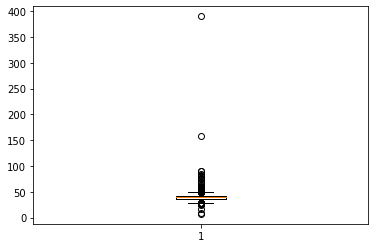

In [15]:
plt.boxplot(tenis_df['avg_seconds_point'])
plt.show()

+ *En aquest primer box plot veiem que sembla haver-hi pocs outliers però molt extrems*

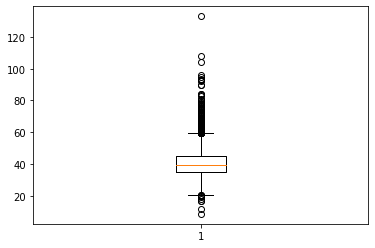

In [16]:
plt.boxplot(tenis_df['avg_minutes_set'])
plt.show()

+ *I en aquest segons box plot veiem que sembla haver-hi bastants outliers però no tan extrems*

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
robscaler = RobustScaler()
data = robscaler.fit_transform(tenis_df)

In [19]:
data

array([[ 0.92      ,  1.46296296,  0.3877551 ,  0.5       ],
       [-0.22666667, -0.59259259,  0.10204082,  0.33333333],
       [ 0.98666667,  0.62962963,  0.43877551,  0.53030303],
       ...,
       [-0.50666667, -0.31481481,  0.01020408,  0.87878788],
       [-1.09333333, -0.77777778, -0.66326531, -0.62121212],
       [ 0.16      , -0.59259259,  0.51020408,  0.57575758]])

In [20]:
from pandas import DataFrame

In [21]:
tenis_robscaler_df = DataFrame(data)
tenis_robscaler_df

,0,1,2,3
0,0.920000,1.462963,0.387755,0.500000
1,-0.226667,-0.592593,0.102041,0.333333
2,0.986667,0.629630,0.438776,0.530303
3,0.413333,0.814815,0.153061,0.363636
4,0.333333,0.148148,0.428571,-0.136364
...,...,...,...,...
9818,-0.226667,-0.296296,0.204082,0.393939
9819,0.186667,0.018519,0.897959,0.075758
9820,-0.506667,-0.314815,0.010204,0.878788
9821,-1.093333,-0.777778,-0.663265,-0.621212


In [22]:
tenis_robscaler_df.rename(columns = {0:'avg_minutes_game', 1:'avg_seconds_point', 2: 'avg_minutes_set', 3:'match_minutes' }, inplace = True)
tenis_robscaler_df

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
0,0.920000,1.462963,0.387755,0.500000
1,-0.226667,-0.592593,0.102041,0.333333
2,0.986667,0.629630,0.438776,0.530303
3,0.413333,0.814815,0.153061,0.363636
4,0.333333,0.148148,0.428571,-0.136364
...,...,...,...,...
9818,-0.226667,-0.296296,0.204082,0.393939
9819,0.186667,0.018519,0.897959,0.075758
9820,-0.506667,-0.314815,0.010204,0.878788
9821,-1.093333,-0.777778,-0.663265,-0.621212


In [23]:
tenis_robscaler_df.describe()

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
count,9823.000000,9823.000000,9823.000000,9823.000000
mean,0.054425,0.058694,0.075683,0.098308
std,0.776384,1.073571,0.818191,0.715526
min,-4.386667,-5.888889,-3.153061,-1.863636
25%,-0.480000,-0.481481,-0.459184,-0.439394
50%,0.000000,0.000000,0.000000,0.000000
75%,0.520000,0.518519,0.540816,0.560606
max,7.440000,65.018519,9.540816,7.954545


*Podiem haver abordat el problema dels outliers d'altres maneres,com per exemple:*

  + Quantile_based Flooring and Capping: trobant el percentil 10 i el percentil 90 de cada variable i deixant fora del dataset
    tots aquelles observacions amb  valors, per sota i per sobre respectivament.
  + Trimming: Treient per complert tots els outliers, d'acord amb un criteri.
  + Log Transformation:vTransformant les variables esbiaxades per corregir la distribució.Es pot fer amb el logaritme o amb
    l'arrel quadrada.
  + IQR Score: Aquesta tècnica utilitza els IQR scores per elimiar els outliers.La norma és que qualsevol valor que no estigui
    en el rang de (Q1 - 1.5IQR) i (Q3 + 1.5IQR) és un outlier i pot ser eliminat.
    
    *__Mirem d'aplicar aquesta última tècnica : IQR Score__*

In [24]:
tenis_df

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
0,4.81,46.8,43.3,173.0
1,3.95,35.7,40.5,162.0
2,4.86,42.3,43.8,175.0
3,4.43,43.3,41.0,164.0
4,4.37,39.7,43.7,131.0
...,...,...,...,...
10155,3.95,37.3,41.5,166.0
10156,4.26,39.0,48.3,145.0
10157,3.74,37.2,39.6,198.0
10158,3.30,34.7,33.0,99.0


In [25]:
tenis_df.describe()

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
count,9823.000000,9823.000000,9823.000000,9823.000000
mean,4.160818,39.216950,40.241698,146.488344
std,0.582288,5.797282,8.018269,47.224700
min,0.830000,7.100000,8.600000,17.000000
25%,3.760000,36.300000,35.000000,111.000000
50%,4.120000,38.900000,39.500000,140.000000
75%,4.510000,41.700000,44.800000,177.000000
max,9.700000,390.000000,133.000000,665.000000


+ *Apliquem el codi que ens deixarà en el dataset aquels valors compresos enel rang especificat abans, i comprovem amb 
   el mètode ".shape" que ha quedat un dataset amb menys observacions (les que provocaven els outliers)*

In [26]:
tenis_no_outliers_df = tenis_df[~((tenis_df < (Q1 - 1.5 * IQR)) |(tenis_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(tenis_no_outliers_df.shape)

(9479, 4)


+ *Fem una ullada amb ".describe()" i comprovem que els valors min i max ara queden molt més propers als quartils 25% i 75%*

In [27]:
tenis_no_outliers_df.describe()

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
count,9479.000000,9479.000000,9479.000000,9479.000000
mean,4.122529,38.899040,39.596360,144.975947
std,0.517464,3.862099,6.828992,44.560637
min,2.640000,28.200000,20.700000,23.000000
25%,3.750000,36.200000,34.700000,111.000000
50%,4.100000,38.800000,39.300000,138.000000
75%,4.470000,41.500000,44.300000,175.000000
max,5.630000,49.800000,59.300000,276.000000


+ *Igualment ho podem visualitzar fent un box plot d'alguna variable*

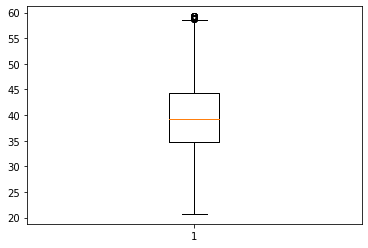

In [28]:
plt.boxplot(tenis_no_outliers_df['avg_minutes_set'])
plt.show()

+ *Ara importo MinMaxScaler from sklearn.preprocessing*

In [29]:
from sklearn.preprocessing import MinMaxScaler

+ *I normalitzo amb la funció importada els valors de les 4 variables numèriques que tinc en el meu dataset*

In [30]:
mmscaler = MinMaxScaler()
final_tenis_df = mmscaler.fit_transform(tenis_no_outliers_df[['avg_minutes_game', 'avg_seconds_point', 'avg_minutes_set', 'match_minutes']])

In [31]:
final_tenis_df

array([[0.72575251, 0.86111111, 0.58549223, 0.59288538],
       [0.43812709, 0.34722222, 0.51295337, 0.54940711],
       [0.74247492, 0.65277778, 0.5984456 , 0.60079051],
       ...,
       [0.36789298, 0.41666667, 0.48963731, 0.6916996 ],
       [0.22073579, 0.30092593, 0.31865285, 0.30039526],
       [0.53511706, 0.34722222, 0.61658031, 0.61264822]])

+ *Amb la funció dataframe converteixo el array obtingut anteriorment*

In [32]:
final_mmscaler_tenis_df = DataFrame(final_tenis_df)
final_mmscaler_tenis_df

,0,1,2,3
0,0.725753,0.861111,0.585492,0.592885
1,0.438127,0.347222,0.512953,0.549407
2,0.742475,0.652778,0.598446,0.600791
3,0.598662,0.699074,0.525907,0.557312
4,0.578595,0.532407,0.595855,0.426877
...,...,...,...,...
9474,0.438127,0.421296,0.538860,0.565217
9475,0.541806,0.500000,0.715026,0.482213
9476,0.367893,0.416667,0.489637,0.691700
9477,0.220736,0.300926,0.318653,0.300395


+ *I reanomeno les columnes amb el nom original per fer-ho més entenedor i presentable*

In [33]:
final_mmscaler_tenis_df.rename(columns = {0:'avg_minutes_game', 1:'avg_seconds_point', 2: 'avg_minutes_set', 3:'match_minutes' }, inplace = True)
final_mmscaler_tenis_df

,avg_minutes_game,avg_seconds_point,avg_minutes_set,match_minutes
0,0.725753,0.861111,0.585492,0.592885
1,0.438127,0.347222,0.512953,0.549407
2,0.742475,0.652778,0.598446,0.600791
3,0.598662,0.699074,0.525907,0.557312
4,0.578595,0.532407,0.595855,0.426877
...,...,...,...,...
9474,0.438127,0.421296,0.538860,0.565217
9475,0.541806,0.500000,0.715026,0.482213
9476,0.367893,0.416667,0.489637,0.691700
9477,0.220736,0.300926,0.318653,0.300395
